# Jupyter UX Survey 2015 - Initial Sandbox

* Goal: Start looking at how we can surface insights from the data.
* Description: https://github.com/jupyter/design/tree/master/surveys/2015-notebook-ux
* Data: https://raw.githubusercontent.com/jupyter/design/master/surveys/2015-notebook-ux/20160115235816-SurveyExport.csv

## Initial Questions

### To what audiences is the Jupyter Community trying to cater?

* New to the practice of "data science"
* Experienced audience not using jupyter
* Existing audience

### How can we boil down the free text to "themes"?

* Remove stop words and find key terms to do some frequency counts
* Read and tag everything manually, then analyze the tags
* Overlap between responses to the various questions
* Apply coccurence grouping to the text
* Throw text at the alchemy Keyword Extraction API and see what it pulls out
* Bin short vs long and analyze separately

### What roles do the survey respondant fill? And in what fields / industries do they fill those roles?

See the [Roles]() section down below.

### Generally, what themes do we see across the free-text responses?

See the [Themes]() in hinderances section for an initial approach on how to find and expand on sets of themes for one particular question. We think we can apply this to the other questions as well.

### What themes do we see across the free-text responses but within the role/industry categories?

e.g., Is it always software developers that are asking for IDE features vs hard scientists asking for collaboration features?

We took an initial approach on rolling up the roles into a smaller set of categories. We then looked at mapping the requests for vim/emacs and ide feature to the software engineering related roles. It turns out that these requests seem to cross roles, and are not specific to software engineers. More of the responses for emacs/vim, in fact, came from respondants from the hard sciences (e.g. physicist, computational biologist, etc.)

This led us to believe that we should not assume certain roles are certain hinderances, but rather try to visualize if there are any hot-spots between roles and hinderance themes. It may turn out, we hypothesize, that the roles have little to do with the hinderances and that the themes are cross cutting. Or not.

We plan to create heatmap-like plots, one per question. On one axis we will have the role categories and on the other we will have the themes we identify within the responses for that question. After creating these plots for all questions, we'll also create similar plots where we substitute industry, years in role, # of notebook consumers, frequency of use, etc. on one of the axes and keep the themes on the other.

### What shortcodes can we use to refer to the questions?

Assume we roll up the answers into single columns:

* how_often
* how_long
* hinderance
* integrated
* how_run
* workflow_needs_addressed
* workflow_needs_not_addressed
* pleasant_aspects
* difficult_aspects
* features_changes
* first_experience_enhancements
* keywords
* role
* years_in_role
* industry
* notebook_consumers

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.set_option('max_colwidth', 1000)

In [8]:
df = pd.read_csv('../20160115235816-SurveyExport.csv')

In [9]:
df.columns

Index(['Time Started', 'Date Submitted', 'Status',
       'How often do you use Jupyter Notebook?',
       'What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?',
       'Roughly how long have you been using Jupyter Notebook?',
       'Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ',
       'Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ',
       'Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ',
       'How do you run the Jupyter Notebook?',
       'Other - Write In:How do you run the Jupyter Notebook?',
       'Workflow Need #1:What needs in your workflow does Jupyter Notebook address?',
       'Workflow Need #2:What needs in your workflow does Jupyter Notebook address?',
       'Work

## Themes in the hinderances

Let's start with the hinderances question and figure out the process first. Then we can apply it to the other free form text responses (we think).

In [10]:
hinder = df['What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?']

How many non-null responses are there?

In [11]:
hinder.isnull().value_counts()

True     943
False    763
Name: What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?, dtype: int64

Clear out the nulls.

In [12]:
hinder = hinder.dropna()

How much did people write?

In [13]:
char_lengths = hinder.apply(lambda response: len(response))

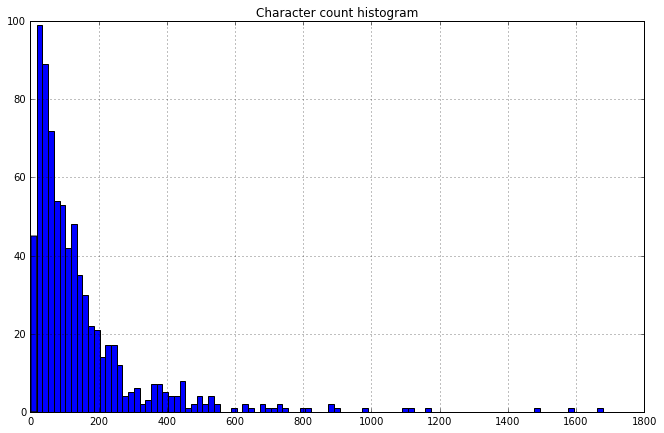

In [14]:
fig, ax = plt.subplots(figsize=(11, 7))
char_lengths.hist(bins=100, ax=ax)
ax.set_title('Character count histogram')

We should definitely look at the longest responses. These are people who might have felt very strongly about what they were writing.

In [52]:
for row in hinder[char_lengths > 1400]:
    print(row)
    print()

It's starting to become a regular tool. I run the notebook server on a VPS and use the notebook through SSH. I run the notebook server on code in a Git master branch and I sync that with a local branch periodically. I have mostly just used Idle in the past because that is very flexible and I get a complete transcript of my programming session. But support for Idle and improvements to Idle have mostly stopped. I like the general idea of the notebook but the format doesn't support some things very well - testing for example. I would like to have my tests in a separate notebook that is linked to the one I'm currently developing (same kernel I guess). I would like my tests to be separate because if they are in the same notebook as my normal code then it is distracting. I could migrate out my tests to  a separate file, but then they are not in the same notebook format as the regular code which is very convenient.  Some things in Jupyter are frustrating: 1. the kernel cannot be reliably inte

Now just to get the constrast, let's look at some of the shortest responses.

In [63]:
hinder[char_lengths < 100].sample(20)

1310                                           Cutting cells. Drag and drop them with mouse. 
1048                  Version control (and, which is related, collaborative version control).
892                                                                    Mobile editor features
1517                - An easily launched text-editor from the notebook code cells themselves.
14                                                                            git integration
871                               not easy to terminate the running cell, often no response. 
1576                                                         Nothing, really. It works great.
1663                                                      Not enough people use it around me.
960                                      Nothing, I always use it for the tasks it can handle
1460                                                Kernels' interaction like Beaker Notebook
1512    Ease of integration into command line tools, lack of

From reading a bunch of random samples of the shortest responses, we've got a list of ideas that we think we can search for across all of the responses in order to judge how common the themes are.
    
* Nothing
* UX / navigation / mobile / paradigm
* IDE / debug / editor familiarity /  comfort zone / keys
* Setup / learning / getting started / perceived lack of skills
* Inertia
* Colleagues / peer pressure
* Version control / git / history / tracking / provenance
* Collaboration / export / sharing
* Integration / missing languages / extensibility

Before we do, let's look at a few "medium-length" responses too for good measure.

In [67]:
for x in list(hinder[(char_lengths < 300) & (char_lengths > 100)].sample(20)):
    print(x)
    print()

 * Lack of interconnection between notebooks. Loading notebooks as modules is still non-trivial * non-trivial UI customization * No native spell-checker * No "templates" * No more user profiles or read-only mode

* No spell checker * Non-trivial to use notebooks as modules * Non-trivial customization of notebooks * No more read-only access 

The requirement for sequential execution of cells and no concepts of 'modulazation' (call cell x in notebook y) means it is always somewhat cumbersome to use if you are doing anything complicated.   But mostly the reluctance of others to use it. 

Editing capabilities for text. Ability to convert from notebook form to plain text and back again?  Working on multiple notebooks.

The lack of version control (tracking changes using git does not work well) My own knowledge about how to use functions in other notebooks, etc.

The only time I don't use jupyter is when collaborating with others who don't. Usually the collaborators are stuck on Matlab and u

We can add a few themes to the list we created above (which we'll replicate here to keep growing it as we go, because, history):

* Nothing
* UX / navigation / mobile / paradigm
* IDE / debug / editor familiarity /  comfort zone / keys
* Setup / learning / getting started / perceived lack of skills / community / documentation
* Inertia
* Colleagues / peer pressure
* Version control / git / history / tracking / provenance
* Collaboration / export / sharing / dirt simple deploy
* Customization / personalization
* Reuse / modularization
* Integration / missing languages / extensibility

In [76]:
keywords = ['git', 'version control', 'history', 'track', 'checkpoint', 'save']

In [77]:
def keywords_or(text):
    for keyword in keywords:
        if keyword in text: 
            return text
    return None

In [78]:
results = hinder.map(keywords_or)

In [79]:
len(results.dropna())

93

In [80]:
results.dropna()

14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              git inte

Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:

1. Take a random sample of question responses
2. Write down common theme keywords
3. Search back through the responses using the theme keywords
4. Expand the set of keywords with other words seen in the search results
5. Repeat for all themes and questions

Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

## Roles

We want to pull out the major roles that people self-identified as filling when they use Jupyter Notebook.

In [100]:
roles_df = df[['What is your primary role when using Jupyter Notebook (e.g., student,\xa0astrophysicist, financial modeler, business manager, etc.)?']]

In [101]:
roles_df = roles.dropna()

We're renaming the column for brevity only.

In [104]:
roles_df.columns = ['role']

Some basic normalization. TODO: do more later.

In [107]:
roles_df['role_norm'] = roles_df.role.str.lower()

For now, we're going to look at the top 20 and see what industries they support from the other columns

In [109]:
roles_df.role_norm.value_counts()

data scientist                                                            84
student                                                                   51
researcher                                                                40
data analyst                                                              28
software engineer                                                         17
phd student                                                               15
developer                                                                 15
astrophysicist                                                            14
physicist                                                                 14
financial modeler                                                         14
engineer                                                                  10
software developer                                                        10
scientist                                                                  9

## Industry vs Role

In [112]:
len(df['Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?'].dropna())

661

In [113]:
len(df['Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?'].dropna())

308

In [114]:
len(df['Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?'].dropna())

98

In [127]:
industry_df = df[
    ['Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?',
     'Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?',
     'Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?',
     'What is your primary role when using Jupyter Notebook (e.g., student,\xa0astrophysicist, financial modeler, business manager, etc.)?'
    ]
]

In [128]:
industry_df.columns = ['industry1', 'industry2', 'industry3', 'role']

In [129]:
industry_df = industry_df.dropna(how='all')

In [133]:
top_roles = roles_df.role_norm.value_counts()[:20]

In [135]:
top_industry_df = industry_df[industry_df.role.isin(top_roles.index)]

In [137]:
top_industry_df[top_industry_df.role == 'data analyst']

,industry1,industry2,industry3,role
92,IT,Publishing,NaN,data analyst
93,Business Intelligence,NaN,NaN,data analyst
152,energy,physics,teaching,data analyst
194,finance,IT,NaN,data analyst
437,automotive,IT,data analytics,data analyst
620,Internet,NaN,NaN,data analyst
837,bioinformatics,NaN,NaN,data analyst
887,web app,NaN,NaN,data analyst
1151,IT,NaN,NaN,data analyst
1347,academia,NaN,NaN,data analyst


## Example: Software Engineering Role

We want to see if software engineers (or related roles) are the ones asking about IDE-like features.

In [138]:
software_roles = ['engineer', 'software engineer', 'developer', 'software developer', 'programmer']

In [144]:
role_hinder_df = pd.merge(roles_df, hinder_df, left_index=True, right_index=True)

In [147]:
role_hinder_df = role_hinder_df.ix[:, 1:]

In [148]:
role_hinder_df[role_hinder_df.role_norm.isin(software_roles)]

,role_norm,"What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"
48,developer,Ability to easily move library code from notebooks to modules.
52,developer,Code editing is inferior to IDEs
69,software engineer,I mostly write libraries. Notebooks are not the right artifact for non-interactive computing.
89,software engineer,"Git integration, CSS themes"
129,engineer,"I'd like to use the jupyterhub with my colleagues but it is available only on linux and we live, unfortunately, in a win environment"
148,software developer,"* The fact that it requires opening a new browser window (I might not want to open a browser at all, or add a tab inside my current/default browser) * The volatility of the environment (it's not easy to have an overview of how many notebooks are open, and their working folder etc.)"
155,developer,IMO Jupyter is still publication tool rather then programming tool. (Databricks notebooks look better). I would prefer way how to better roll up code.
159,engineer,A console is usually faster for what I need
163,software engineer,"I spend most of my time doing library/application development, and mostly don't need to save records of my work. I use notebooks as scratch areas and one-off things."
198,engineer,Colleagues using Matlab


In [162]:
tmp_df = role_hinder_df.dropna()

In [164]:
tmp_df[tmp_df.ix[:, 1].str.contains('emacs|vim', case=False)]

,role_norm,"What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"
11,data application developer,Browser becomes unresponsive when I start a too intensive computation. Poor integration with my preferred code editors (pycharm or vim).
105,data scientist,Version control with git. Cell merging. Cell grouping and hiding. Vim key bindings.
123,data scientist,It doesn't work well with standard version control tools because one line of code doesn't correspond to one line in the notebook file It throws away 30 years of text editor development by replacing a real editor like vim or emacs with a HTML text area.
135,academic researcher,"It's not as nice an 'editor' as a 'proper' programmers text editor (such as Emacs, Sublime, Atom etc). It can be tricky to scroll up and down and deal with large cells with lots of code. It's difficult to run an IPython Notebook server that has support for both Py2 and Py3 kernels - ideally, there should be some way to integrate with conda so that you can easily start kernels in any conda environment. Similarly, I often end up with multiple 'ipython notebook' commands (from the Terminal) running at once, as I want them to be in multiple different directories and in multiple conda environments. Combining this with the previous point: it'd be great if I could have it running as a service (or something similar), and then could just easily create a kernel from any conda environment, and navigate to the right folder - and have it all 'just work' without having to run new servers all the time"
138,scientist,I usually use emacs.
246,researcher (physics),"1. For advanced terminal users, the lack of full emacs (or vi I guess) editing modes is annoying. Maybe it is just that the IPython terminal is too awesome already! 2. Version controlling ipynb files is annoying (but possible and I do it for some notebooks)."
254,data scientist,"ability to script in the notebook so I don't have to have a terminal open for editing standalone code it would be amazing if a text file could be opened and edited in a cell. the other problem is absence of something like vim keybindings. The notebook sucks as a text editor. If there was a vim mode w .vimrc type customization, I'd be in heaven and would likely never not code in jupyter."
261,student,"Shortcut bindings. I'm most productive in vim, the shortcuts in the notebook just don't feel as fluid. Probably isn't a problem that's solvable, but someone might have a nice solution."
265,computational biologist,I prefer running R in Emacs.
275,software developer,- Difficulty in maintaining emacs-like editing capabilities


In [169]:
tmp_df[tmp_df.ix[:, 1].str.contains('\W+ide\W+', case=False)]

,role_norm,"What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"
34,research scientist,"Lack of proper debugging tools (comparable to e.g. Eclipse IDE, Visual Studio or Matlab)."
43,teacher,"Give notebooks more editors/ide functionnality: easier file browsing, editing, serach and replace..."
119,developer of scientific software,"I prefer developing in a full IDE, like PyCharm."
305,cognitive scientist,The lack of facilities for code re-use. I know there are hacks for importing between notebooks and the like but it still doesn't beat a text editor and DVCS when I want to make something that I'll import or make available on GitHub. My notebooks tend to get messy and out of order. Maybe I need to figure out a better workflow but I often feel a traditional console (i.e. qtconsole) is better (along with the aforementioned editor or IDE).
406,economic consulting / professional economic analysis,- Does not have variable explorer (like Spyder IDE). - Does not have a standalone desktop application (have you thought about using GitHub's Electron to develop a desktop application?)
444,"really, astrophysicist","Everything, that distinguished it from IDE like Pycharm. But it is fine"
524,student,"Knowing where to find out about change, other tools like matlab ide , some programming languages have poor intergration"
653,phd student,Switching back and forth between notebook and editor/IDE is distracting and time consuming.
681,phd student,Strong gap between editing code in IDE and writing a Jupyter Notebook (juggling between Python scripts and notebooks is not as easy as it could be)
694,financial modeler,It is more of a notebook but it would be nice if it acted almost like an IDE for project-management. Being able to run multiple modules or pages that link together in the same instance to help break up the notebook page into manageable chunks then a means to pull it all together into a final cohesive program would be quite useful.


## Years in Role vs Role Name

In [180]:
years_in_role = df.ix[:, 32]

In [181]:
years_in_role.value_counts()

2-5 years           323
5+ years            270
1 year               87
Less than 1 year     67
Name: How many years have you been in this role? , dtype: int64

In [182]:
how_long =  df.ix[:, 5]

In [183]:
how_long.value_counts()

One year or more      814
Less than one year    263
Name: Roughly how long have you been using Jupyter Notebook?, dtype: int64

In [191]:
using_vs_role = df[[5, 32]]

In [192]:
using_vs_role.columns = ['how_long_using', 'how_long_role']

In [223]:
pd.crosstab(using_vs_role.how_long_role, using_vs_role.how_long_using)

how_long_using,Less than one year,One year or more
how_long_role,,
1 year,24,63
2-5 years,64,258
5+ years,48,222
Less than 1 year,37,30
